# Analisis Energias Renovables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
df=pd.read_csv('res/energias_renovables.csv')
print(df.shape)
df.sample(5)

(15904, 8)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
10501,BRN,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,1989,0.190,NaN
15204,URY,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,1988,43.590,NaN
5364,BEN,RENEWABLE,TOT,KTOE,A,2004,1623.353,NaN
2185,BRA,RENEWABLE,TOT,KTOE,A,1961,NaN,L
11322,DOM,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,1970,NaN,L


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15904 entries, 0 to 15903
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    15904 non-null  object 
 1   INDICATOR   15904 non-null  object 
 2   SUBJECT     15904 non-null  object 
 3   MEASURE     15904 non-null  object 
 4   FREQUENCY   15904 non-null  object 
 5   TIME        15904 non-null  int64  
 6   Value       12017 non-null  float64
 7   Flag Codes  3887 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 994.1+ KB


In [22]:
df.describe(include='all')

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
count,15904,15904,15904,15904,15904,15904.000000,1.201700e+04,3887
unique,142,1,1,2,1,NaN,NaN,1
top,AUS,RENEWABLE,TOT,KTOE,A,NaN,NaN,L
freq,112,15904,15904,7952,15904,NaN,NaN,3887
mean,NaN,NaN,NaN,NaN,NaN,1987.500000,1.322108e+04,NaN
std,NaN,NaN,NaN,NaN,NaN,16.163738,9.203502e+04,NaN
min,NaN,NaN,NaN,NaN,NaN,1960.000000,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,1973.750000,9.580000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,1987.500000,7.486000e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,2001.250000,1.816018e+03,NaN


In [11]:
df.isnull().sum()

LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value          3887
Flag Codes    12017
dtype: int64

<Axes: >

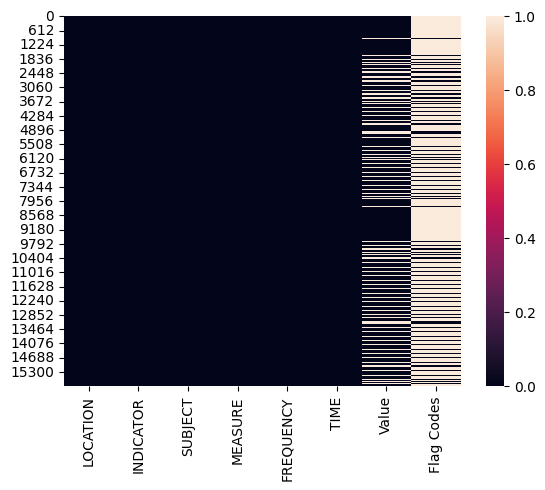

In [20]:
sns.heatmap(df.isnull())

In [16]:
for i in df.select_dtypes('object').columns:
    print(f'{i}: {df[i].unique()}')

LOCATION: ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'OEU' 'ALB' 'DZA' 'ARG' 'ARM' 'AZE'
 'BGD' 'BLR' 'BIH' 'BRA' 'BRN' 'BGR' 'KHM' 'CHL' 'CHN' 'COL' 'HRV' 'CYP'
 'EGY' 'EST' 'ETH' 'GEO' 'GHA' 'HTI' 'HKG' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'LVA' 'LTU' 'MKD' 'MYS' 'MLT' 'MDA' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL'
 'ROU' 'RUS' 'SAU' 'SGP' 'SVN' 'ZAF' 'SDN' 'TWN' 'TZA' 'THA' 'UKR' 'ARE'
 'URY' 'VNM' 'ZMB' 'WLD' 'SRB' 'MNE' 'G20' 'EU28' 'OECD' 'AGO' 'BHR' 'BEN'
 'BOL' 'BWA' 'CMR' 'COG' 'CRI' 'CIV' 'CUB' 'PRK' 'COD' 'DOM' 'ECU' 'SLV'
 'ERI' 'GAB' 'GTM' 'HND' 'IRQ' 'JAM' 'JOR' 'KEN' 'KWT' 'KGZ' 'LBN' 'LBY'
 'MNG' 'MAR' 'MMR' 'NAM' 'NPL' 'NIC' 'NER' 'OMN' 'PAN' 'QAT' 'SEN' 'LKA'
 'SYR' 'TJK' 'TGO' 'TTO' 'TUN' 'TKM' 'UZB' 'VEN' 'YEM' 'ZWE']
INDICATOR: ['RENEWABLE']
SUBJECT: ['TOT']
MEASURE: ['KTOE' 'PC_PRYENRGSUPPLY']
FREQUENCY: ['A']
Flag Codes: [nan 'L']
